<a href="https://colab.research.google.com/github/tpyte001/comput_phy/blob/main/cometary_orbit_draft3_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ValueError: ignored

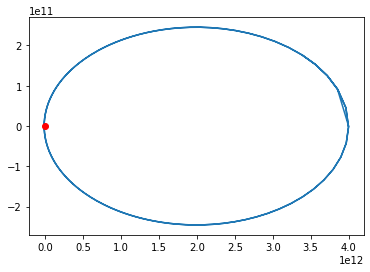

In [63]:
import numpy as np
import matplotlib.pyplot as plt


#initial values
x = 4*(10**12) # m
y = 0          # m
vx = 0         # m/s
vy = 500       # m/s
M = 1.9989e30     # kg # M = mass of sun
G = 6.67430e-11   # N*m**2/kg**2 # G = Newtons gravitational constant
# our 4 functions, derived from original differential vector equation
def f(rvec, t): 
  x = rvec[0]
  y = rvec[1]
  vx = rvec[2]
  vy = rvec[3]
  r = (x**2 + y**2)**0.5
  f_x = vx
  f_y = vy
  f_vx = -G*M*(x/r**3)
  f_vy = -G*M*(y/r**3)
  fvec = np.array([f_x, f_y, f_vx, f_vy], float)
  return fvec

# simplified RK4 Function to give initial 3 calculations in order to find error
def RK4(rvec,h):
  t=0
  k1 = h * f(rvec,t) 
  k2 = h * f(rvec + (k1/2), t + (h/2))
  k3 = h * f(rvec + (k2/2), t + (h/2))
  k4 = h * f(rvec + k3, t+h)
  rvec = rvec + (1/6)*(k1 + (2*k2) + (2*k3) + k4)

  return(rvec)

#initial step size, delta, and radius vector list
h = 1000              #initial step size
delta = .001         #km/year so delta has to be km/second?   3.154e+7 seconds/year #error tolerance? confused about this parameter0.
rvec = [x,y,vx,vy]    #our 4 equations

t = 0                  #t initial
t_f = 2*10**9          #t final, time for one orbit

xlist = []
ylist = []
tlist = []
"""
f0 = RK4(rvec,h) #RK4 with step size h
f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
xerror = (f1[0] - f2[0]) #/30 # evaluates x component of error
yerror = (f1[1] - f2[1]) #/30 # evaluates y component of error
combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
rho = 30*delta * h / combined_error
"""
while t < t_f:
# inital h choice input here
# Error calculation:
  
  f0 = RK4(rvec,h) #RK4 with step size h
  f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
  f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
  xerror = (f1[0] - f2[0]) #/30 # evaluates x component of error
  yerror = (f1[1] - f2[1]) #/30 # evaluates y component of error
  combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
  rho = 30*delta * h / combined_error
  
  """
  try: #prevents division by 0
    rho = 30*delta * h / combined_error
  except RuntimeWarning:
    rho = 30*h*delta/(1**-10)
  """
  #print(rho)
  #if rho < 1: #our accuracy is poor, reevaluate from scratch with new h  

  while rho < 1:
    
    #h = h * rho ** (1/4)
    
    # Error calculation:
    f0 = RK4(rvec,h) #RK4 with step size h
    f1 = RK4(f0,h)   #RK4 with step size (2h) from time t + h
    f2 = RK4(rvec, 2*h) #RK4 with step size (2h) from t = 0
    xerror = (f1[0] - f2[0]) # evaluates x component of error
    yerror = (f1[1] - f2[1]) # evaluates y component of error
    combined_error = (np.sqrt(xerror**2+yerror**2)) #combined error
    rho = 30*delta * h / combined_error
    """
    try: #prevents division by 0
      rho = 30*delta * h / combined_error
    except RuntimeWarning:
      rho = 30*h*delta/(1**-10)
    """
    h = h * rho ** (1/4)

  rvec = f1
  tlist.append(t)   
  xlist.append(f1[0])
  ylist.append(f1[1])
  h = h * rho ** (1/4)
  t = t + h

plt.plot(xlist,ylist)
plt.plot(0,0, "o r")
plt.annotate([0,0],"sun")

[3999999998332.3423, 3999868346012.2056, 2516858097609.7373]
[9999999.998610286, 2809677583.0155954, 237488583117.56207]
[0, 2799708.4092593743, 1033689396.4824715]
31.37923734202745
1548014647.9141383
2581704044.39661
[ 2.51685810e+12  2.37488583e+11 -6.27831741e+03  2.02245761e+02]
[ 2.51931997e+12  2.38447419e+11 -6.21636213e+03  2.07946937e+02]


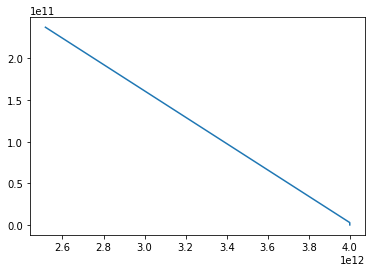

In [54]:
print(xlist)
print(ylist)
print(tlist)
print(rho)
print(h)
print(t)
print(f1)
print(f2)

plt.plot(xlist,ylist)